# WeatherPy


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#Set URL and create lists


# set lists for the dataframe

cities_df = [["City","Country","Date","Cloudiness","Humidity","Latitude","Longitude","Temperature","Wind Speed"]]
for i, city in enumerate(cities):
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={city}&units=Imperial"
   
   
    if requests.get(url).json()["cod"] == 200:
        # process the row
        print(f"Processing Record {i} | {city}")
        cities_df.append([
            requests.get(url).json()["name"],
            requests.get(url).json()["sys"]["country"],
            requests.get(url).json()["dt"],
            requests.get(url).json()["clouds"]["all"],
            requests.get(url).json()["main"]["humidity"],
            requests.get(url).json()["coord"]["lat"],
            requests.get(url).json()["coord"]["lon"],
            requests.get(url).json()["main"]["temp_max"],
            requests.get(url).json()["wind"]["speed"]
        ])
    else:
        # skip the row
        print(f"{city} not found. Skipping ...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 0 | port lincoln
Processing Record 1 | mataura
Processing Record 2 | hasaki
Processing Record 3 | luderitz
Processing Record 4 | barrow
Processing Record 5 | hilo
Processing Record 6 | saskylakh
Processing Record 7 | saint anthony
Processing Record 8 | chokurdakh
Processing Record 9 | hermanus
Processing Record 10 | victoria
Processing Record 11 | luganville
Processing Record 12 | tuktoyaktuk
taolanaro not found. Skipping ...
Processing Record 14 | ribeira brava
Processing Record 15 | bethel
Processing Record 16 | nikolskoye
Processing Record 17 | lagoa
Processing Record 18 | rikitea
Processing Record 19 | touros
Processing Record 20 | deputatskiy
Processing Record 21 | busselton
Processing Record 22 | pontianak
Processing Record 23 | yellowknife
Processing Record 24 | kodiak
Processing Record 25 | chuy
Processing Record 26 | bandarbeyla
Processing Record 27 | vaini
Processing Record 28 | qaanaaq
Processing Record 29 | sorland
Processing Record 30 | mount isa
Processi

Processing Record 248 | victor harbor
Processing Record 249 | maragogi
Processing Record 250 | kavaratti
Processing Record 251 | stokmarknes
Processing Record 252 | mehamn
Processing Record 253 | zhangjiakou
Processing Record 254 | macusani
Processing Record 255 | suna
Processing Record 256 | makakilo city
Processing Record 257 | sambava
Processing Record 258 | naryan-mar
Processing Record 259 | margate
saleaula not found. Skipping ...
Processing Record 261 | vytegra
Processing Record 262 | shakawe
Processing Record 263 | istmina
Processing Record 264 | kulhudhuffushi
Processing Record 265 | kochevo
Processing Record 266 | santo tomas
Processing Record 267 | leshukonskoye
Processing Record 268 | longkou
Processing Record 269 | auki
karaul not found. Skipping ...
Processing Record 271 | marsh harbour
Processing Record 272 | jieshi
Processing Record 273 | southampton
Processing Record 274 | coihaique
Processing Record 275 | constitucion
Processing Record 276 | vanimo
kismayo not found. S

bolungarvik not found. Skipping ...
Processing Record 495 | kruisfontein
Processing Record 496 | jasper
Processing Record 497 | tondano
Processing Record 498 | presidencia roque saenz pena
burkhala not found. Skipping ...
Processing Record 500 | toora-khem
Processing Record 501 | cam ranh
Processing Record 502 | wageningen
anoyia not found. Skipping ...
Processing Record 504 | lompoc
Processing Record 505 | akropong
grand centre not found. Skipping ...
Processing Record 507 | pimentel
Processing Record 508 | ottawa
Processing Record 509 | naze
Processing Record 510 | codrington
Processing Record 511 | haines junction
Processing Record 512 | bar harbor
Processing Record 513 | semnan
Processing Record 514 | mayo
Processing Record 515 | sur
Processing Record 516 | plainview
Processing Record 517 | tacoronte
Processing Record 518 | berdigestyakh
Processing Record 519 | mbanza-ngungu
Processing Record 520 | bonthe
Processing Record 521 | orsk
bargal not found. Skipping ...
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
cities_df

with open("cities_df.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(cities_df)
    
displayData = pd.read_csv("cities_df.csv")
displayData.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Port Lincoln,AU,1571423066,100,65,-34.72,135.86,54.77,24.29
1,Mataura,NZ,1571423068,100,92,-46.19,168.86,45.00,1.01
2,Hasaki,JP,1571423070,75,100,35.73,140.83,62.60,10.29
3,Luderitz,NaN,1571423072,0,82,-26.65,15.16,58.49,3.24
4,Barrow,AR,1571423074,1,48,-38.31,-60.23,66.68,16.69


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

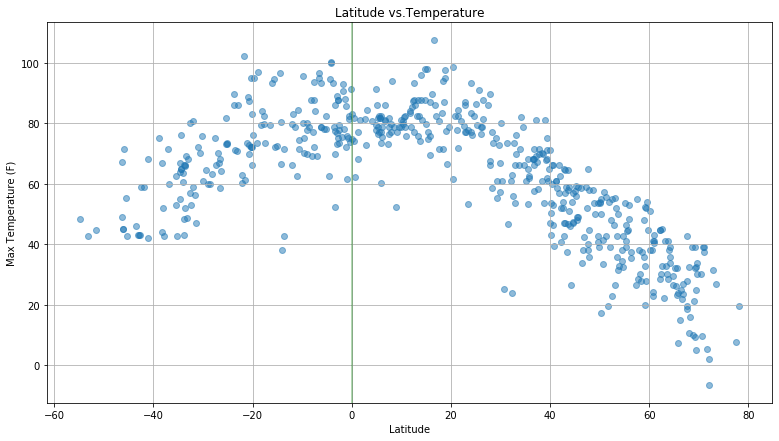

In [14]:
plt.rcParams["figure.figsize"] = [13,7]
plt.grid()
plt.axvline(x=0,color="g",alpha=0.4)

plt.scatter(displayData['Latitude'],displayData['Temperature'],alpha=0.5)
plt.title('Latitude vs.Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# Save the Figure
plt.savefig("latitudes-vs-temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

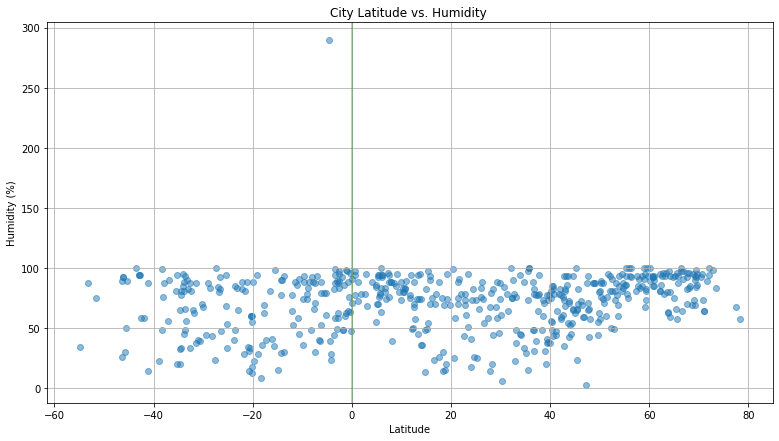

In [15]:
plt.scatter(displayData['Latitude'],displayData['Humidity'],alpha=0.5)
plt.grid()
plt.title('City Latitude vs. Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axvline(x=0,color="g",alpha=0.4)
# Save the Figure
plt.savefig("latitudes-vs-humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

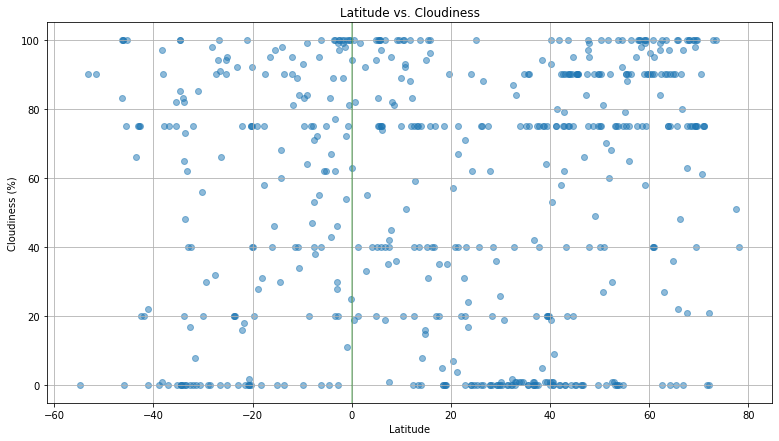

In [16]:
plt.scatter(displayData['Latitude'],displayData['Cloudiness'],alpha=0.5)
plt.grid()
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(x=0,color="g",alpha=0.4)
# Save the Figure
plt.savefig("latitudes-vs-cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

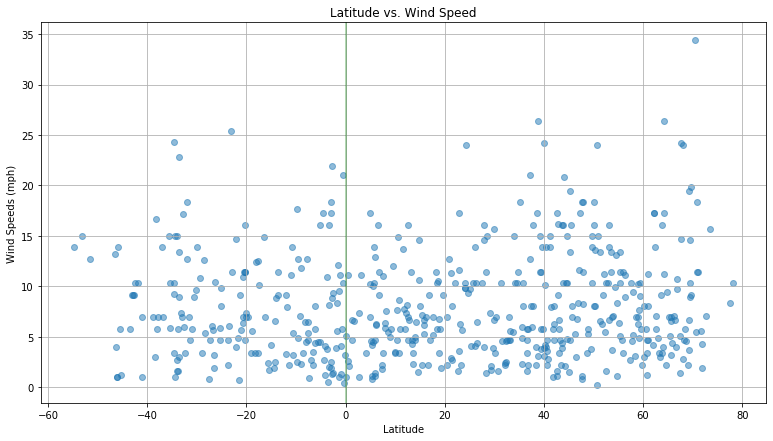

In [17]:
plt.scatter(displayData['Latitude'],displayData['Wind Speed'],alpha=0.5)
plt.grid()
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds (mph)')
plt.axvline(x=0,color="g",alpha=0.4)
# Save the Figure
plt.savefig("city-latitudes-vs-wind-speeds.png")
plt.show()